In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 30.2 MB/s 
     |████████████████████████████████| 4.4 MB 54.2 MB/s 
     |████████████████████████████████| 362 kB 60.3 MB/s 
     |████████████████████████████████| 1.2 MB 55.6 MB/s 
     |████████████████████████████████| 1.1 MB 55.3 MB/s 
     |████████████████████████████████| 101 kB 12.0 MB/s 
     |████████████████████████████████| 212 kB 53.0 MB/s 
     |████████████████████████████████| 140 kB 75.7 MB/s 
     |████████████████████████████████| 596 kB 11.4 MB/s 
     |████████████████████████████████| 127 kB 73.0 MB/s 
     |████████████████████████████████| 94 kB 2.8 MB/s 
     |████████████████████████████████| 144 kB 67.6 MB/s 
     |████████████████████████████████| 271 kB 51.4 MB/s 
     |████████████████████████████████| 6.6 MB 54.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.1

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

Today we are going to observe if we can teach AI to distinguish between "sweets" and "spicy".

Here is the reference blog: https://towardsdatascience.com/classifying-cats-vs-dogs-a-beginners-guide-to-deep-learning-4469ffed086c

In [3]:
!pip install -q jmd_imagescraper

In [4]:
!pip install -Uqq fastbook

import fastbook  #import the fast.ai library
from fastbook import *  #dont't worry, it's designed to work with import *
fastbook.setup_book()
from fastai.vision.widgets import *

#import the image scraper by @JoeDockrill, website: https://joedockrill.github.io/blog/2020/09/18/jmd-imagescraper-library/
from jmd_imagescraper.core import * 
from pathlib import Path
from jmd_imagescraper.imagecleaner import *


In [5]:
food=['sweets','spicy']
path = Path().cwd()/"food"#assigns path to current working directory

In [6]:
duckduckgo_search(path,"sweets","sweets",max_results=100) #downloads 100 images of 'sweets' and saves it in path/sweets

Duckduckgo search: sweets


[Path('/content/food/sweets/001_243bc24e.jpg'),
 Path('/content/food/sweets/002_c68c67db.jpg'),
 Path('/content/food/sweets/003_157b3b16.jpg'),
 Path('/content/food/sweets/004_d99d8729.jpg'),
 Path('/content/food/sweets/005_cb6fcd24.jpg'),
 Path('/content/food/sweets/006_29419ea9.jpg'),
 Path('/content/food/sweets/007_0bec8110.jpg'),
 Path('/content/food/sweets/008_19e2c9f3.jpg'),
 Path('/content/food/sweets/009_d8bb6b8b.jpg'),
 Path('/content/food/sweets/010_2935287d.jpg'),
 Path('/content/food/sweets/011_9946746f.jpg'),
 Path('/content/food/sweets/012_bf0942b5.jpg'),
 Path('/content/food/sweets/013_65e42761.jpg'),
 Path('/content/food/sweets/014_b2bcf3cb.jpg'),
 Path('/content/food/sweets/015_93c7116b.jpg'),
 Path('/content/food/sweets/016_34d35770.jpg'),
 Path('/content/food/sweets/017_3be925d4.jpg'),
 Path('/content/food/sweets/018_e06f62a7.jpg'),
 Path('/content/food/sweets/019_1cd4b779.jpg'),
 Path('/content/food/sweets/020_a9040be1.jpg'),
 Path('/content/food/sweets/021_17cfa669

In [7]:
duckduckgo_search(path,"spicy","spicy",max_results=100)#downloads 100 images of 'spicy' and saves it in path/spicy


Duckduckgo search: spicy


[Path('/content/food/spicy/001_56bed5b0.jpg'),
 Path('/content/food/spicy/002_e058f5bc.jpg'),
 Path('/content/food/spicy/003_124973cd.jpg'),
 Path('/content/food/spicy/004_c114033b.jpg'),
 Path('/content/food/spicy/005_adb03a11.jpg'),
 Path('/content/food/spicy/006_b3345f6b.jpg'),
 Path('/content/food/spicy/007_abfa0a42.jpg'),
 Path('/content/food/spicy/008_4e2cf3df.jpg'),
 Path('/content/food/spicy/009_5e6d1d87.jpg'),
 Path('/content/food/spicy/010_99ba9cae.jpg'),
 Path('/content/food/spicy/011_03350d56.jpg'),
 Path('/content/food/spicy/012_4678daeb.jpg'),
 Path('/content/food/spicy/013_d451b1cb.jpg'),
 Path('/content/food/spicy/014_71b92ec2.jpg'),
 Path('/content/food/spicy/015_fa95f826.jpg'),
 Path('/content/food/spicy/016_6cfbc9b2.jpg'),
 Path('/content/food/spicy/017_96dbac1e.jpg'),
 Path('/content/food/spicy/018_589fb22c.jpg'),
 Path('/content/food/spicy/019_e787eb92.jpg'),
 Path('/content/food/spicy/020_a9f97586.jpg'),
 Path('/content/food/spicy/021_2c567b60.jpg'),
 Path('/conte

In [8]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [9]:
fns=get_image_files(path)
fns

(#200) [Path('/content/food/sweets/035_f5d3c24f.jpg'),Path('/content/food/sweets/070_4e6c853d.jpg'),Path('/content/food/sweets/017_3be925d4.jpg'),Path('/content/food/sweets/045_9147b848.jpg'),Path('/content/food/sweets/033_25a666cb.jpg'),Path('/content/food/sweets/055_9d5dd73c.jpg'),Path('/content/food/sweets/052_c78d2e1c.jpg'),Path('/content/food/sweets/088_82bb0d1d.jpg'),Path('/content/food/sweets/006_29419ea9.jpg'),Path('/content/food/sweets/096_5ba9bd4e.jpg')...]

In [10]:
failed=verify_images(fns)#looks for files that arent images
failed

(#0) []

In [11]:
failed.map(Path.unlink);#unlinks the failed files from the folder


In [12]:
food=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),#splits the dataset into a training set and validation set
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [13]:
dls=food.dataloaders(path)

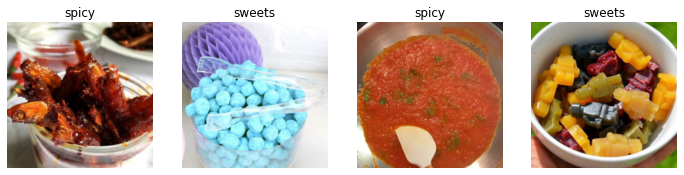

In [14]:
dls.valid.show_batch(max_n=4,nrows=1)

In [15]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)#training our model
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.287708,2.316523,0.475000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.801180,1.580288,0.450000,00:02
1,0.675193,0.789121,0.275000,00:01
2,0.566100,0.375569,0.175000,00:01
3,0.479632,0.254146,0.150000,00:02


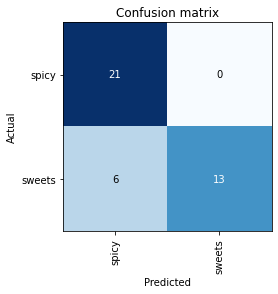

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()#plots a confusion matrix

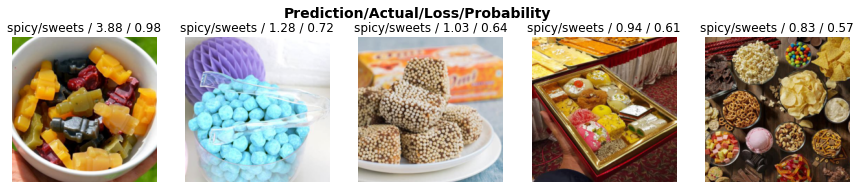

In [17]:
interp.plot_top_losses(5, nrows=1)


In [18]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')

btn_upload = widgets.FileUpload()#Displays a widget which can be used to upload images from your system
btn_upload

FileUpload(value={}, description='Upload')

In [20]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))#resizes the uloaded image
out_pl


Output()

In [21]:
pred,pred_idx,probs = learn_inf.predict(img)#asks the model to predict the animal in the image!
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'#displays the output in a readable format
lbl_pred 

Label(value='Prediction: spicy; Probability: 0.9869')